In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro, kstest

pd.set_option('display.max_columns', None) 

import warnings
warnings.filterwarnings("ignore")

In [20]:
datos = pd.read_csv('Datos/datos_empresa_final.csv', index_col=0)
datos.sample(3)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,remotework,id_encuesta
20,45,No,Non travel,1238.0,Research & development,1,1,3,M,74.0,2,3,Healthcare representative,3,Other,3395,3,No,23,4.0,4,1,25.0,3,2.0,23,14,4,1978,No,21
129,52,No,Travel rarely,956.0,Unknown,6,2,4,M,78.0,3,2,Research scientist,1,Divorced,22087,3,Yes,12,0.0,2,2,18.0,3,3.0,10,6,9,1971,Yes,130
1408,35,No,Travel rarely,992.0,Unknown,1,3,4,M,68.0,2,1,Laboratory technician,1,Other,21731,1,No,19,3.0,2,0,10.0,3,3.0,3,1,2,1988,No,1409


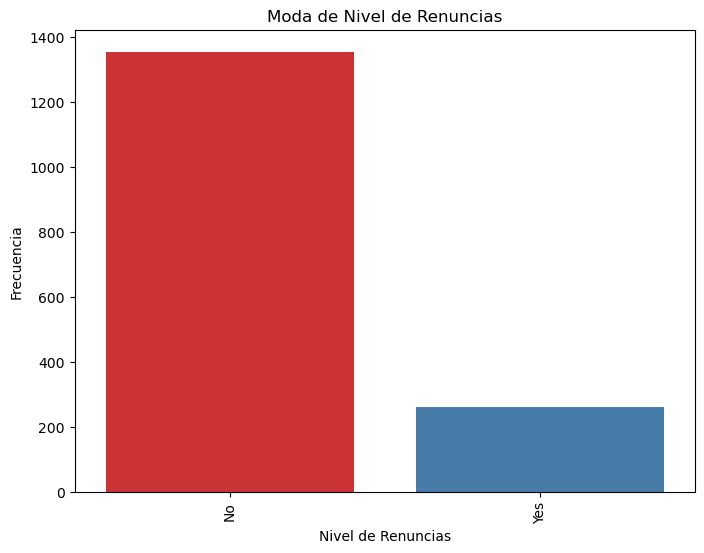

In [41]:
# Cómo estamos haciendo un estudio sobre la gente que se marcha de la empresa, queremos primero visualizar la columna de 'attrition'
# Para variables categóricas (como niveles educativos, estados, etc.) usaremos un 'countplot()'
# Este gráfico de barras mostrará la frecuencia de cada nivel educativo y resaltará cuál es el más común (la moda).

plt.figure(figsize=(8, 6))
sns.countplot(x='attrition', 
              data=datos, 
              palette='Set1')
plt.xlabel('Nivel de Renuncias')
plt.ylabel('Frecuencia')
plt.title('Moda de Nivel de Renuncias')
plt.xticks(rotation=90);

In [22]:
# Vemos que el nivel de renuncias de los encuestados es bajo pero queremos ver su %. Primero contaremos las respuestas haciendo un dataframe nuevo.
df_attrition = datos.groupby("attrition")["id_encuesta"].count().reset_index()
df_attrition

,attrition,id_encuesta
0,No,1355
1,Yes,259


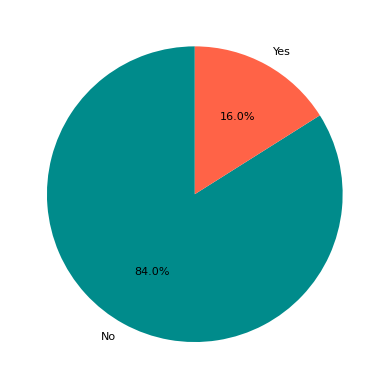

In [38]:
colores = ["darkcyan", "tomato"]

# creamos el gráfico de quesito para ver los porcentajes.
plt.pie("id_encuesta",
        labels = "attrition",
        data = df_attrition, 
        autopct =  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90);

Podemos ver que tenemos un 16% de gente que se "fuga" en la empresa.

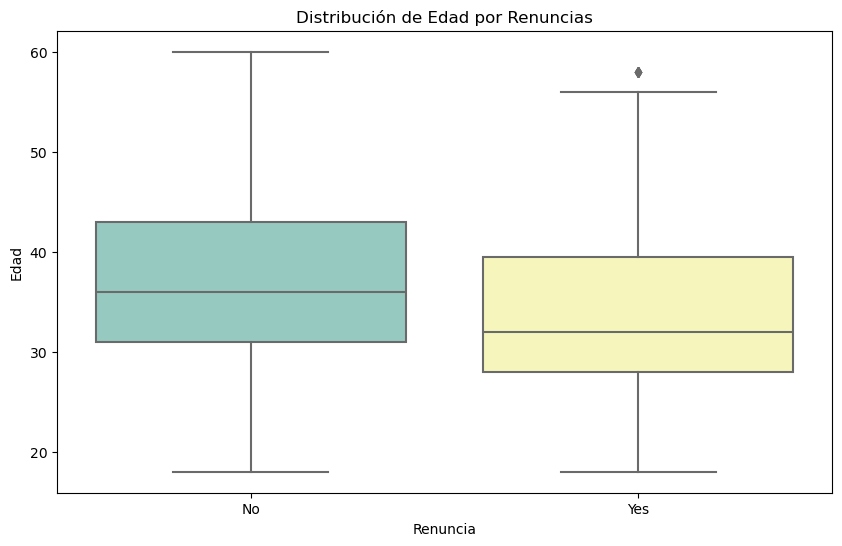

In [43]:
# Queremos ver si hay una relación con la edad con esta cantidad de renuncias. Lo veremos con un boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(x='attrition', y='age', data=datos, palette='Set3')

plt.title('Distribución de Edad por Renuncias')
plt.xlabel('Renuncia')
plt.ylabel('Edad')
plt.show()

In [49]:
# Vamos a sacar la mediana y media de ambos datos.

datos['age'].describe()

count    1614.000000
mean       36.926890
std         9.098121
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: age, dtype: float64

In [51]:
datos['attrition'].describe()

count     1614
unique       2
top         No
freq      1355
Name: attrition, dtype: object